# Introduction

Now that the idea of a spectrogram is fully understood, we want to delve deeper into various structures beyond the frequency over time. When studying the sound waves over the Mel Scale, we got a taste of this - especially with the MFCCs. While visualizing MFCCs are technically not spectrograms, the rough idea still holds.

This article will be a bit more focused towards Music Information Retrieval (MIR) however, in that we are going to study the changes in pitch over time. To do this, we are going to need to understand what pitch is, how it is notated, and how we can use the Fourier Transformation to determine the changes in pitch.

# What is Pitch?

Pitch can be understood as a relative highness/lowness of a sound. The higher the sound, the higher the pitch and the lower the sound, the lower the pitch. Simple enough, right? To fully understand pitch, we need to understand the pitch classes and octaves.

Pitch classes are the letters that are associated with each sound. All pitches fall under one of the 7 letters: A, B, C, D, E, F, and G. Let's assume we were playing the piano and we started at A. We would keep going up one white key (black keys represent sharp/minor keys which is out of the scope of this article) until we hit the key G. The picture below will show you how this cycle takes place on a keyboard. Again, if you are not familiar with the black keys, do not worry about it.
<p>
    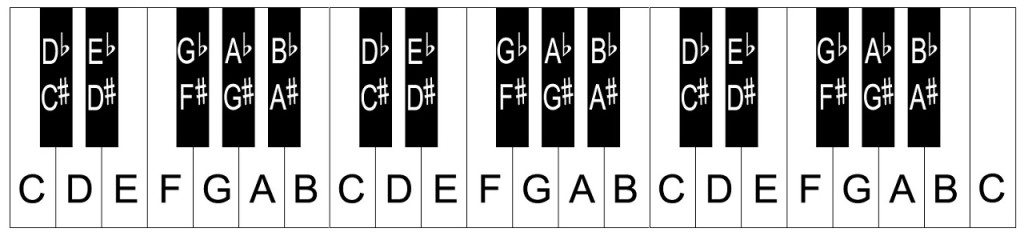
    <em>
        <a href="https://www.piano-keyboard-guide.com/piano-keyboard-layout.html">Picture courtesy of Piano Keyboard Guide</a>
        </em>
</p>

As we ascend with each white key, we inevitably cycle through the letters over and over. However, when we hit the second A key after the G, it is important to note that it is not the same sound we started at originally. The pitch class is the same; it is the A key. However the sound is higher than before, indicating we are in the next (higher) octave. 

Before diving into octaves, let's quickly cover the black keys. If we start at C and go up one black key, we hit what's called C# (pronounced C sharp.) If we look at the figure once more, we also see that it is also called D♭(pronounced D flat.) This is because the black key is also before D. Simply put, if we go up one black key, the note is "sharped" and if we go down one black key, then the note is "flattened." In terms of what humans hear, they are equivalent, so we would call these notes enharmonic. As for the case for when there is no black key between two white keys, you do not have to worry about that for this article as that involves more music theory than what is necessary.

An octave is the number specifying which group of pitches we are in. If we repeated our example knowing we were in A3, the next A key we hit is A4. Again, this should not be too hard to wrap your head around. The middle key of the keyboard is C4 and it is generally used as a reference for which octave you are in.

<p>
    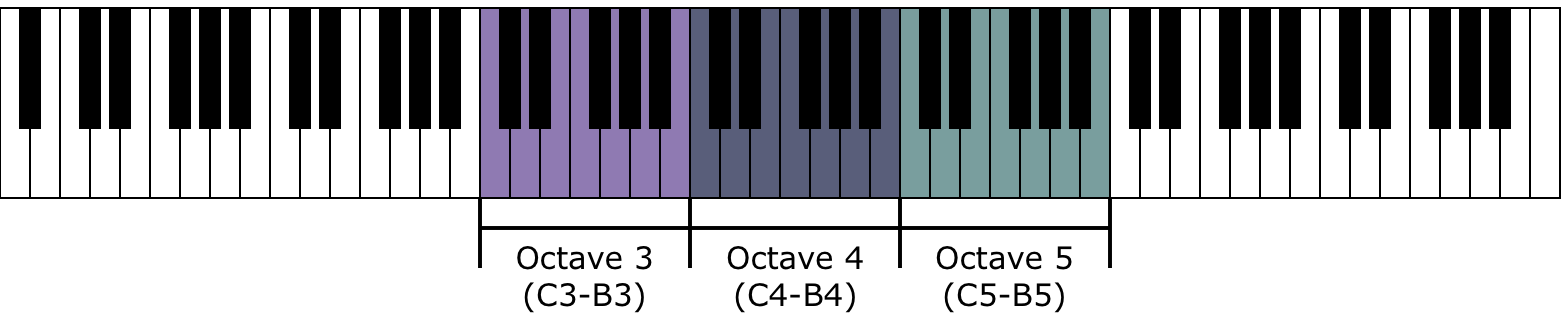
    <em>
        <a href="https://www.allaboutmusictheory.com/piano-keyboard/octave-registers/">Picture courtesy of All About Music Theory</a>
        </em>
</p>

# About Chromagrams

Now that we understand pitch in Music, we can dive into chroma filters which acts as the basis of our chromagrams.

The Chroma filters can be derived from the Chroma filter bank. The filter bank aims to project all the energy of the recorded sound into 12 bins i.e. all the notes we saw, plus the minor/major keys (which is also the black keys of the piano) irrespective of the octave it is in.  By disregarding octave, we can then create a heat-map of how the pitch changes over time, which is an important aspect of MIR. For example, should you decide to teach an LSTM how to play music, these features would be very useful as they would tell the neural network how the pitch would likely change over time.

Let's visualize the Chroma filter bank across various frequencies.

In [1]:
%matplotlib inline
import librosa
import librosa.display
import matplotlib.pyplot as plt

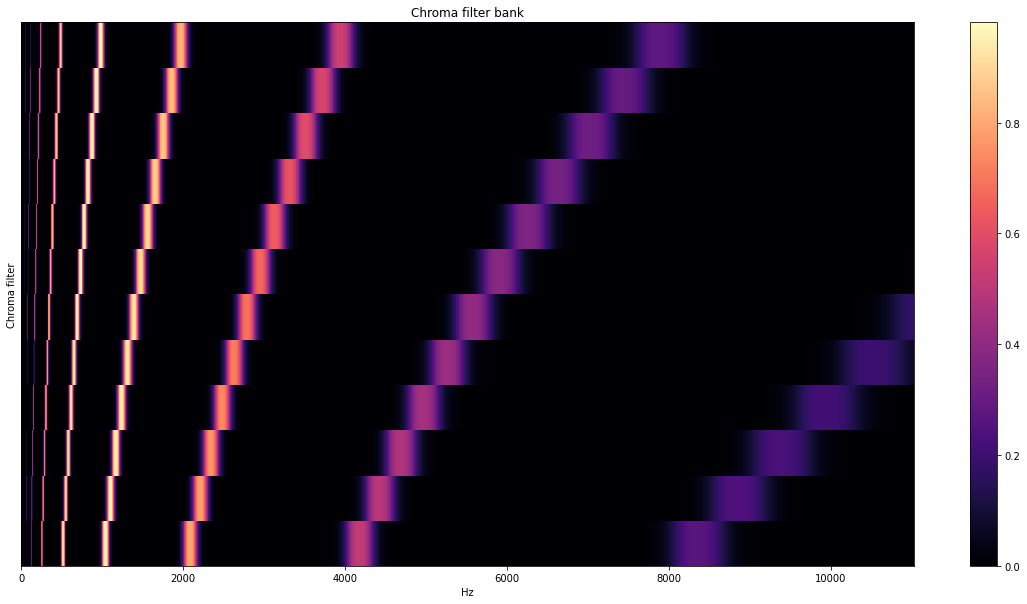

In [2]:
# From https://librosa.org/doc/latest/generated/librosa.filters.chroma.html#librosa.filters.chroma
chromafb = librosa.filters.chroma(22050, 4096)
fig, ax = plt.subplots(figsize=(20,10))
img = librosa.display.specshow(chromafb, x_axis='linear', ax=ax)
ax.set(ylabel='Chroma filter', title='Chroma filter bank')
fig.colorbar(img, ax=ax)

By taking the dot product of our Fourier based spectrogram and this filter bank, we can then map the songs in question onto the set of pitches we discussed prior. Luckily, thanks to `librosa` the function to create the chromagram has been created for us already. Note that we do not have to use the STFT on the audio as our basis, but that is outside the scope of this article.

With this in mind, let's study the chromagrams of our various genre snippets.

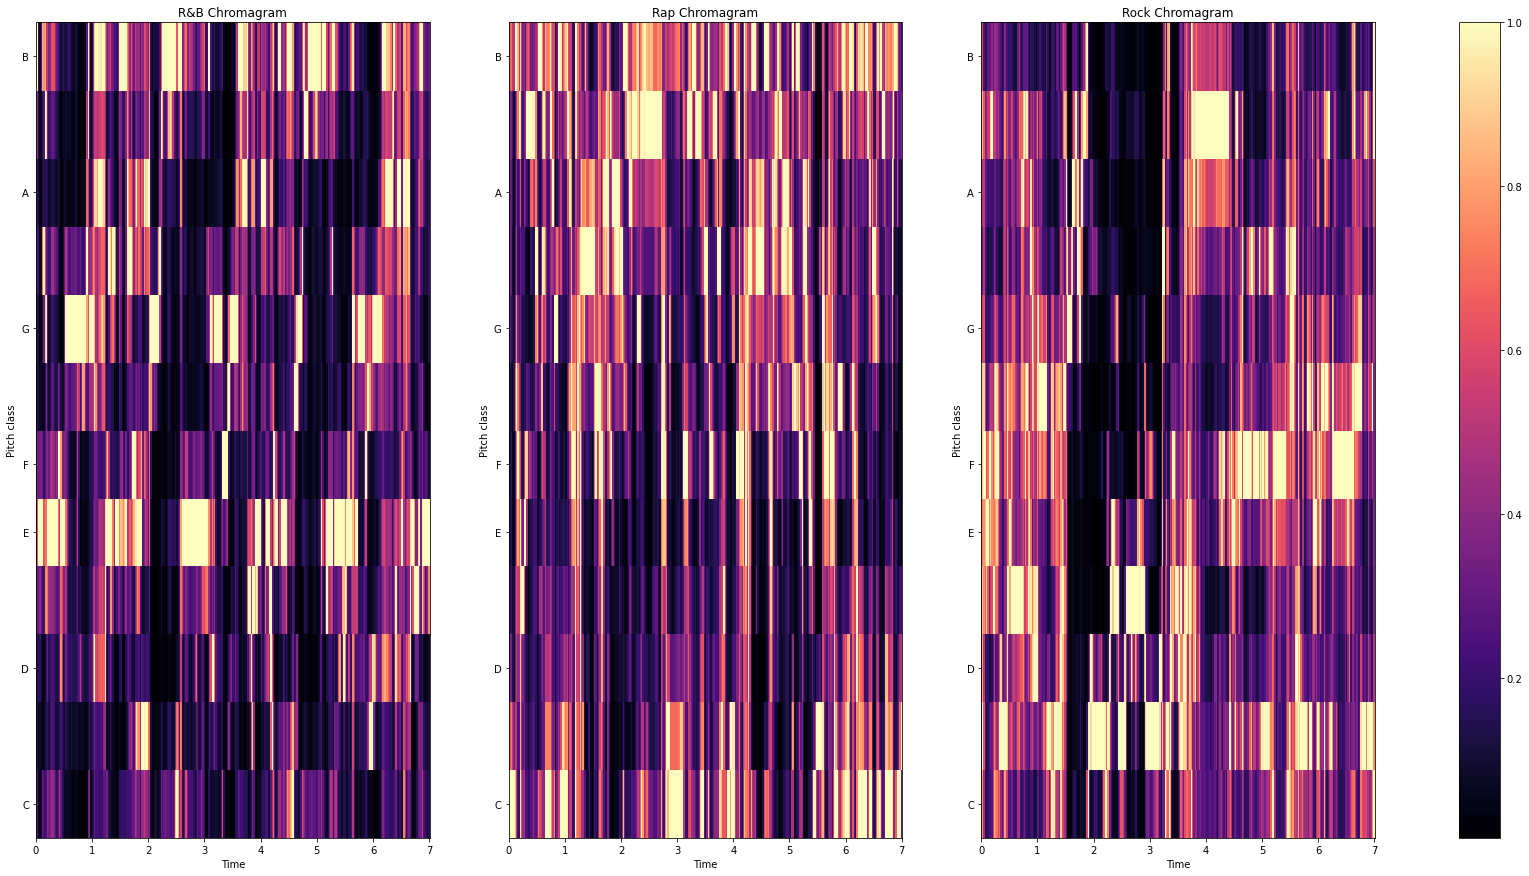

In [3]:
# Load in audio
rb, sr = librosa.load('snippets/rb.wav')
rap, _ = librosa.load('snippets/rap.wav')
rock, _ = librosa.load('snippets/rock.wav')

# Create chromagrams
rb_chroma = librosa.feature.chroma_stft(rb, sr=sr)
rap_chroma = librosa.feature.chroma_stft(rap, sr=sr)
rock_chroma = librosa.feature.chroma_stft(rock, sr=sr)

# Visualize the STFT chromagrams
fig, ax = plt.subplots(1,3, figsize=(30,15))
img = librosa.display.specshow(rb_chroma, y_axis = 'chroma', x_axis='time', ax=ax[0])
ax[0].set(title = 'R&B Chromagram')
librosa.display.specshow(rap_chroma, y_axis = 'chroma', x_axis='time', ax=ax[1])
ax[1].set(title = 'Rap Chromagram')
librosa.display.specshow(rock_chroma, y_axis = 'chroma', x_axis='time', ax=ax[2])
ax[2].set(title = 'Rock Chromagram')
fig.colorbar(img, ax=ax)
plt.show()

Now that we can see how the pitch changes over time, we can see some interesting observations in each genre. 

For R&B, its apparent that the artist decided to keep the song grounded around the E note, for Rap, it is is highly scattered and distributed which makes sense given the genre leverages vocal cadence similar to that of percussion, and for Rock, it is centered around the note C# or D♭.